In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.52942807, -0.65053654, -0.92029124,  0.45989657,  0.36144807,
        -0.63208289,  0.09521513,  0.30615102,  0.03972708, -0.09195829],
       [ 0.93689426,  0.11302638,  0.77357955, -0.57452013, -0.35886246,
         0.1188853 ,  1.14065588,  1.10474355, -0.8788095 ,  2.29569626]])

In [4]:
test_Features[:2]

array([[ 1.00638293,  0.08636055, -0.02352367, -0.35078854, -0.11634585,
         1.6808323 ,  1.0539989 , -0.99090284,  1.43628655, -0.53302718],
       [-0.16064573, -0.52652298, -0.24760976, -0.11939866, -0.14349323,
         0.07156626,  0.26844085, -0.58583999, -0.82124892, -0.35048961]])

In [5]:
train_Label[:4]

array([1, 1, 1, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([0, 1, 1, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=20*6,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=20*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=20*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=20*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=20*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               1320      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               12100     
_________________________________________________________________
dense_3 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_4 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_5 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total para

In [18]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 3s - loss: 0.6891 - acc: 0.6393 - val_loss: 0.6760 - val_acc: 0.6590
Epoch 2/30
 - 0s - loss: 0.5634 - acc: 0.6447 - val_loss: 0.4873 - val_acc: 0.6590
Epoch 3/30
 - 0s - loss: 0.4634 - acc: 0.7669 - val_loss: 0.4015 - val_acc: 0.8239
Epoch 4/30
 - 0s - loss: 0.3811 - acc: 0.8364 - val_loss: 0.3580 - val_acc: 0.8509
Epoch 5/30
 - 0s - loss: 0.3552 - acc: 0.8553 - val_loss: 0.3518 - val_acc: 0.8489
Epoch 6/30
 - 0s - loss: 0.3501 - acc: 0.8561 - val_loss: 0.3398 - val_acc: 0.8640
Epoch 7/30
 - 0s - loss: 0.3355 - acc: 0.8642 - val_loss: 0.3366 - val_acc: 0.8594
Epoch 8/30
 - 0s - loss: 0.3282 - acc: 0.8657 - val_loss: 0.3273 - val_acc: 0.8640
Epoch 9/30
 - 0s - loss: 0.3317 - acc: 0.8655 - val_loss: 0.3259 - val_acc: 0.8640
Epoch 10/30
 - 0s - loss: 0.3210 - acc: 0.8699 - val_loss: 0.3343 - val_acc: 0.8522
Epoch 11/30
 - 0s - loss: 0.3221 - acc: 0.8670 - val_loss: 0.3288 - val_acc: 0.8627
Epoch 12/30
 - 1s - loss: 0.3178 - a

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

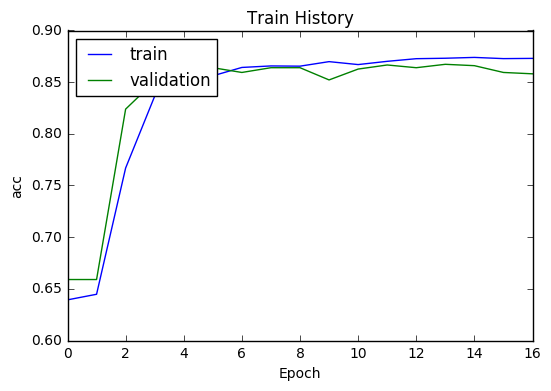

In [21]:
show_train_history(train_history,'acc','val_acc')

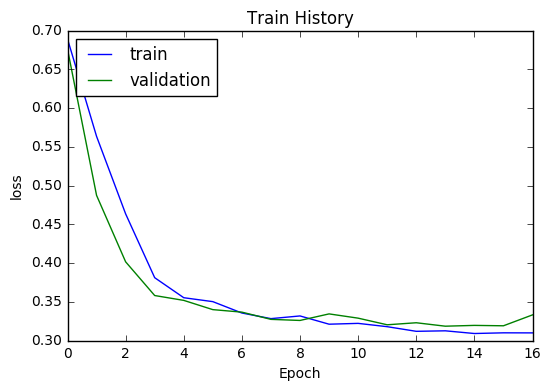

In [22]:
show_train_history(train_history,'loss','val_loss')

In [23]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 20us/step


In [24]:
scores[1]

0.8661934806094687